In [1]:
from tqdm.notebook import tqdm
import os 
import sys
import re
import json

# Lexicon Analysis

In [91]:
lexicons = []

In [92]:
lex_2_name = []

In [93]:
with open('metadata.json') as f:
    metadata = json.load(f)

In [94]:
def import_lexicon(file):
    global lexicons
    with open(file, 'r') as f:
        lexicon = f.readlines()
    lexicon = set(word.strip().lower() for word in lexicon if word.strip())
    regex = r'\b(?:' + '|'.join([l for l in lexicon]) + r')\b'
    compiled = re.compile(regex, re.IGNORECASE)
    lex_2_name.append(file.split('/')[-1].split('_')[0])
    lexicons.append(compiled)

In [97]:
lex_2_name

['misogyny', 'xenophobia', 'insults', 'immigrant']

In [96]:
for lexicon in [f for f in os.listdir('lexicons/') if f.endswith('txt')]:
    import_lexicon('lexicons/' + lexicon)

In [7]:
def import_transcript(transcript):
    with open(transcript) as f:
        text = f.readlines()
    return text
def get_id(transcript):
    return int(transcript.split('_video')[-1][:-4])

In [8]:
def process_transcript(transcript):
    text = import_transcript(transcript)
    stats = [
        [
            regex.findall(line)
        for regex in lexicons
        ]
    for line in text
    ]
    return stats

In [ ]:
transcript_stats = {
    get_id(t): process_transcript('all_transcripts/' + t)
    for t in tqdm(os.listdir('all_transcripts/')) if t.endswith('.txt')
}

In [10]:
# with open('transcript_stats.pkl', 'wb') as f:
#     import pickle
#     pickle.dump(transcript_stats, f)
with open('transcript_stats.pkl', 'rb') as f:
    import pickle
    transcript_stats = pickle.load(f)

In [11]:
unpack = lambda x: x[0] + unpack(x[1:]) if len(x) > 1 else (x[0] if x else [])

In [12]:
def get_stats(idx, lines):
    words = unpack([[y.lower() for y in x[idx]] for x in lines if x[idx]])
    return words

In [13]:
# building a new dict hashed on the video number
vid_to_game = {
    int(v['file_name'][5:-4]): v['game']
    for v in metadata.values()
}

In [53]:
import matplotlib.pyplot as plt

In [14]:
get_stats(0, transcript_stats[0])

['baby',
 'baby',
 'baby',
 'bush',
 'babe',
 'baby',
 'baby',
 'baby',
 'baby',
 'bitch']

In [15]:
import nltk

In [144]:
game_word_cfd = nltk.ConditionalFreqDist()
game_lex_cfd = nltk.ConditionalFreqDist()
word_lex_cfd = nltk.ConditionalFreqDist()
game_fd = nltk.FreqDist()
lex_fd = nltk.FreqDist()
game_lines = {}
word_fd = nltk.FreqDist()

In [145]:
for i, t in tqdm(transcript_stats.items()):
    game = vid_to_game[i] # Name of the game
    game_lines[game] = game_lines.get(game, 0) + len(t[0]) if t else 0
    for lex in range(len(lex_2_name)):
        words = get_stats(lex, t)
        for word in words:
            game_word_cfd[game][word] += 1
            game_lex_cfd[lex_2_name[lex]][game] += 1
            game_fd[game] += 1
            word_lex_cfd[lex_2_name[lex]][word] += 1
            lex_fd[lex_2_name[lex]] += 1
            word_fd[word] += 1
            
        

  0%|          | 0/480 [00:00<?, ?it/s]

<Axes: title={'center': 'Toxic Words by Lexicon'}, xlabel='Samples', ylabel='Counts'>

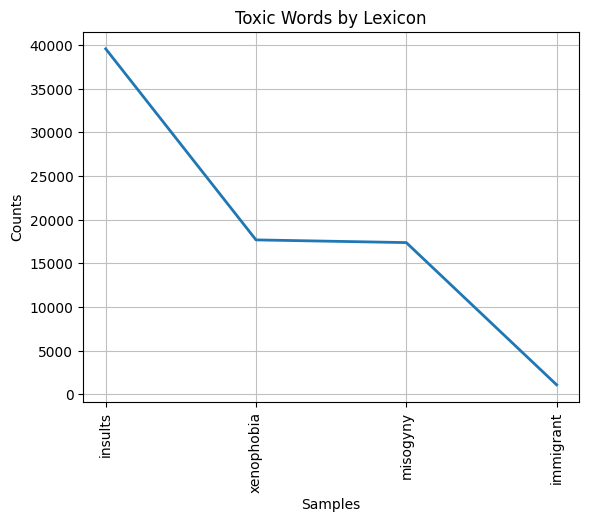

In [146]:
lex_fd.plot(title='Toxic Words by Lexicon')

## Most common Toxic Words by Type

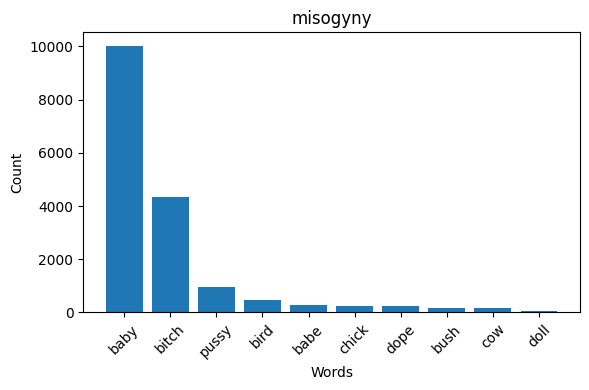

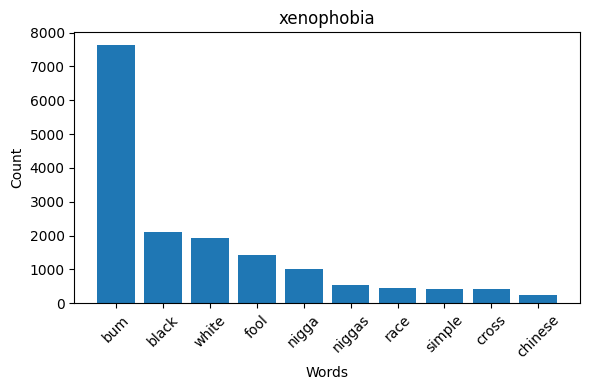

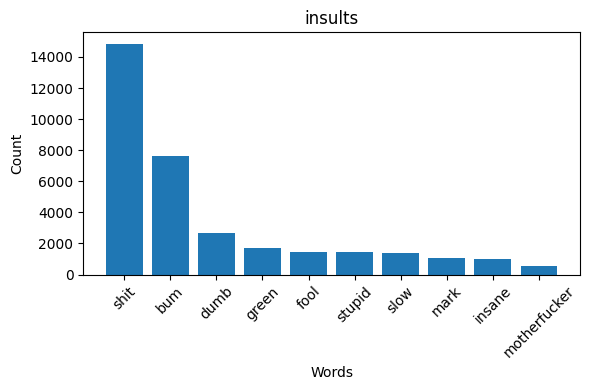

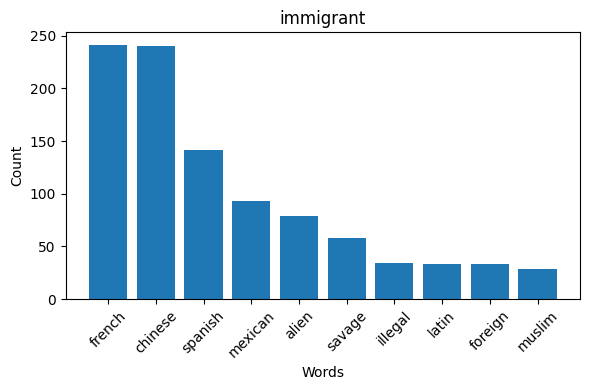

In [147]:
for c in word_lex_cfd.conditions():
    data = word_lex_cfd[c].most_common(n=10)
    words, counts = zip(*data)
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(words, counts)
    plt.title(c)
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Toxic Words by Type and Game

<Axes: title={'center': 'Toxic Words by Type and Game'}, xlabel='Samples', ylabel='Counts'>

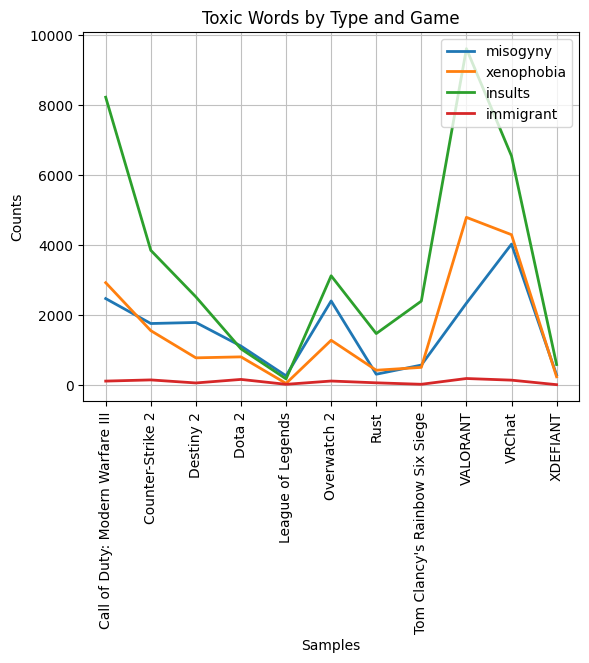

In [102]:
game_lex_cfd.plot(title='Toxic Words by Type and Game')

## Toxic Word Count by Game

<Axes: title={'center': 'Toxic Word Count by Game'}, xlabel='Samples', ylabel='Counts'>

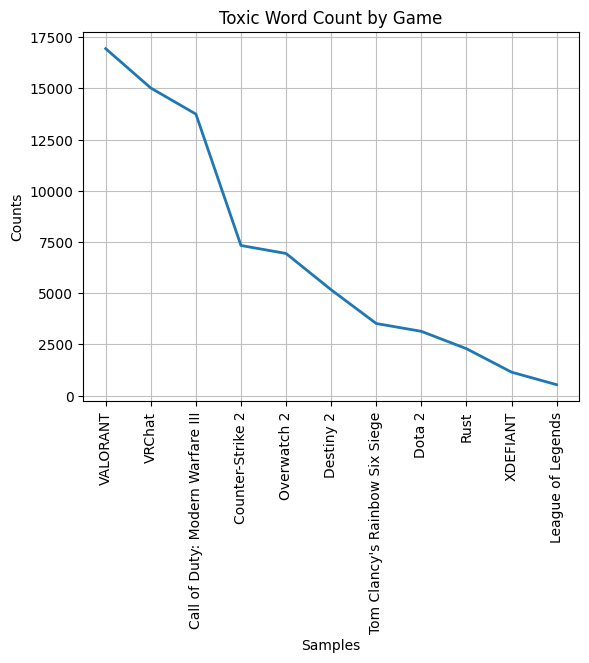

In [124]:
game_fd.plot(title="Toxic Word Count by Game", )

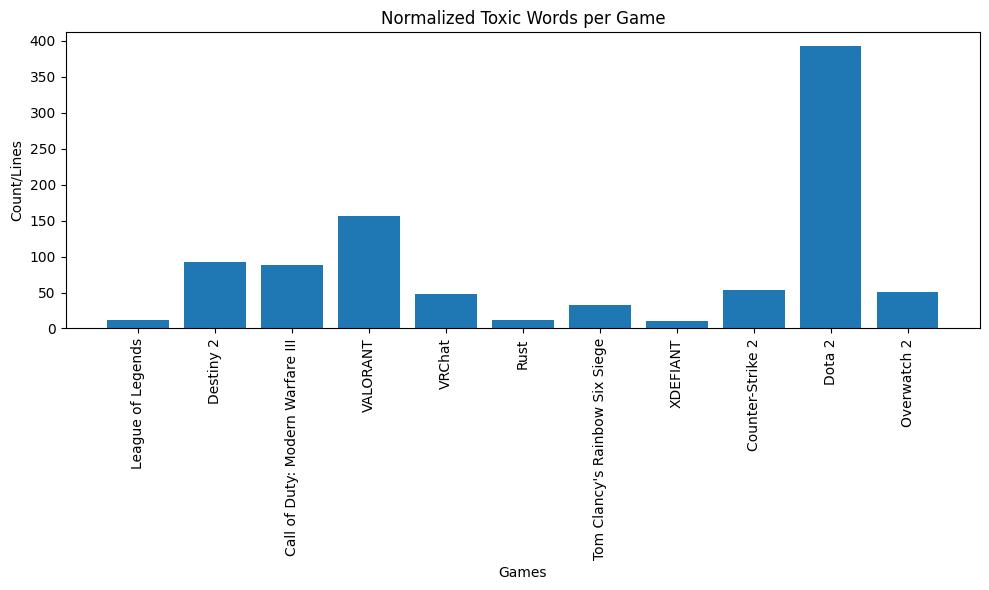

In [125]:
data = [game_fd.keys(), [float(count) / float(lines) for count, lines in zip(game_fd.values(), game_lines.values())]]
plt.figure(figsize=(10, 6))
plt.bar(data[0], data[1])
plt.title("Normalized Toxic Words per Game")
plt.xlabel("Games")
plt.ylabel("Count/Lines")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Most Common Toxic Words by Game

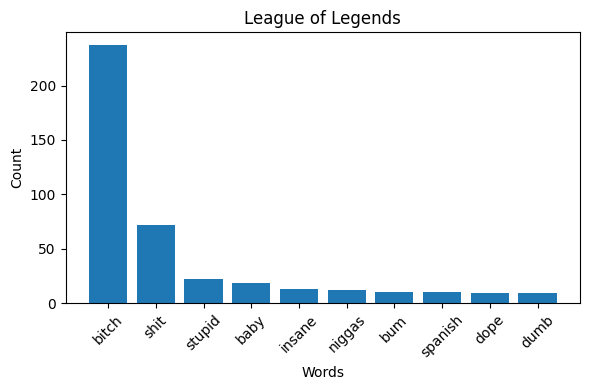

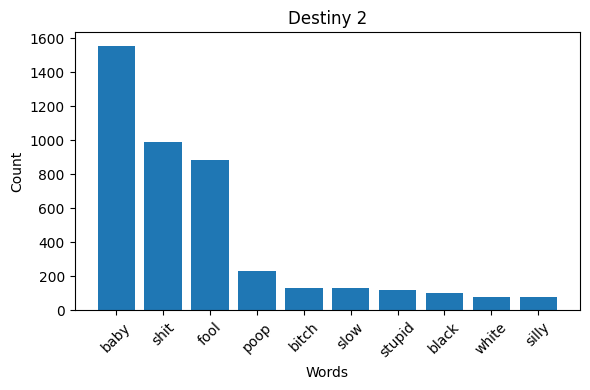

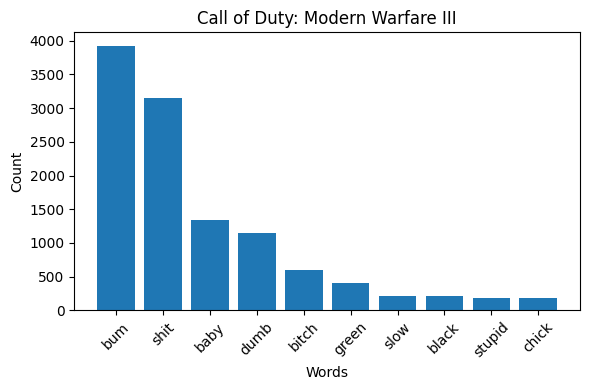

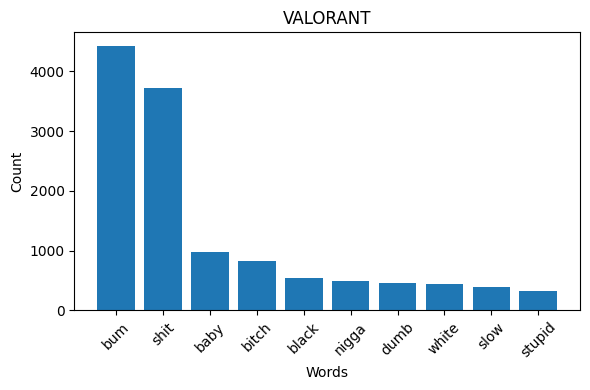

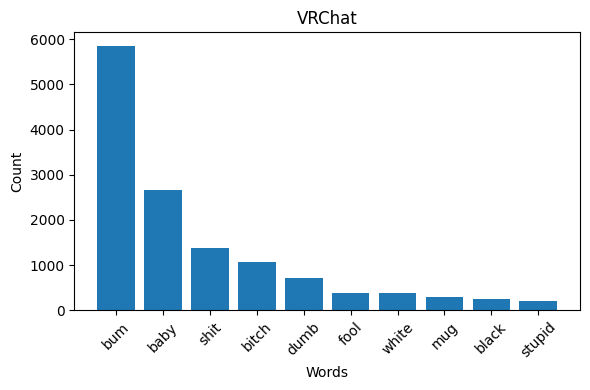

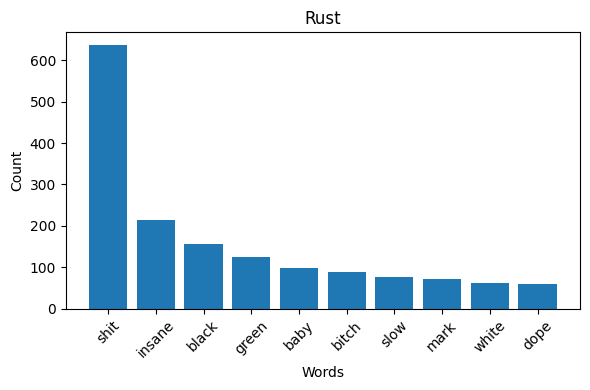

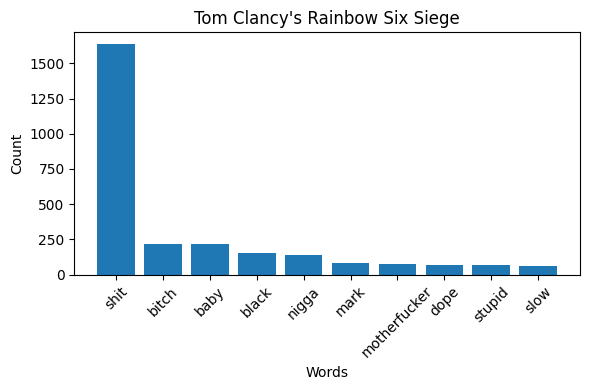

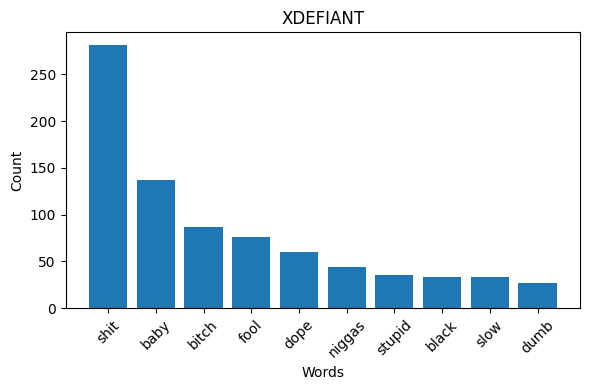

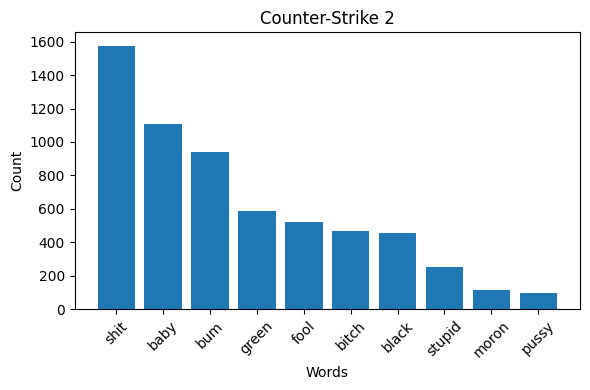

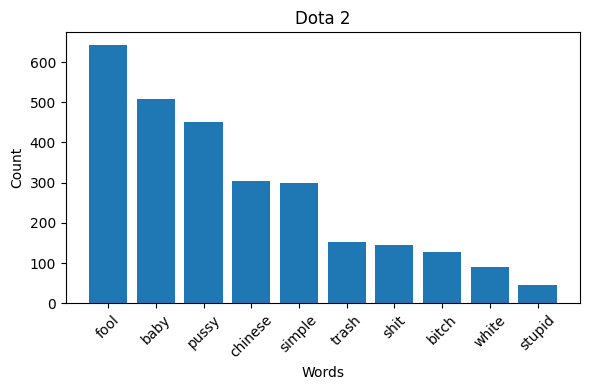

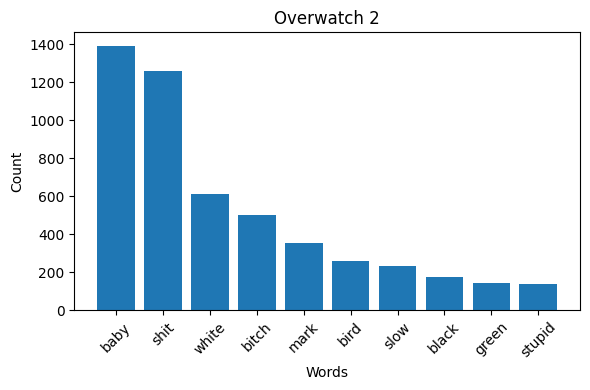

In [103]:
for c in game_word_cfd.conditions():
    data = game_word_cfd[c].most_common(n=10)
    words, counts = zip(*data)
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(words, counts)
    plt.title(c)
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Most Common Toxic Words

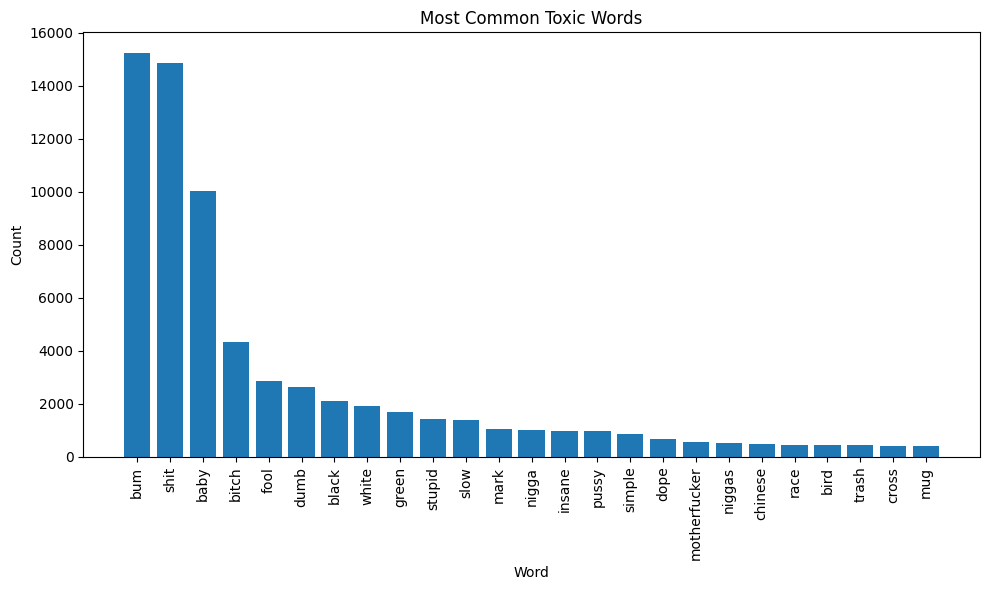

In [183]:
x, y = zip(*word_fd.most_common(n=25))
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title("Most Common Toxic Words")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [180]:
from pprint import pp


print('## Words only used once')
print( ' - ' + '\n - '.join([k for k, v in word_fd.most_common()[::-1][0:47]]))

## Words only used once
 - telltale
 - wretched
 - blockhead
 - mongol
 - fauna
 - niggah
 - stupidness
 - beastly
 - prattler
 - kine
 - mistress
 - what an asshole
 - despicable
 - kike
 - halting
 - uncultured
 - bulgarian
 - unwise
 - prostitutes
 - mongols
 - bulgarians
 - courtesan
 - chatterbox
 - clandestine
 - able-bodied
 - wildcat
 - lithuanian
 - betrayer
 - peruvian
 - honduran
 - guff
 - negroes
 - mongoloid
 - humpback
 - mongering
 - dumbbell
 - runt
 - incapable
 - prince adam
 - niga
 - applesauce
 - blackness
 - argentine
 - twerp
 - foolishness
 - unworthy
 - tasteless


# Token Analysis

In [184]:
def read_transcript(t):
    with open(t) as f:
        txt = f.read()
    return txt

In [185]:
transcript_text = {
    get_id(t): read_transcript('all_transcripts/' + t)
    for t in tqdm(os.listdir('all_transcripts/')) if t.endswith('.txt')
}

  0%|          | 0/481 [00:00<?, ?it/s]

In [186]:
game_text = {}
for i, t in transcript_text.items():
    game = vid_to_game[i]
    game_text[game] = game_text.get(game, "") + "\n" + t

In [188]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [190]:
tokenized_text = {
    game: word_tokenize(txt.lower())
    for game, txt in game_text.items()
}

In [245]:
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union( set(list('(),!?.:') ))
stop_words = stop_words.union( 
    ("''", "``", "thank", 'sorry', "'m", "much", "n't", "yeah", "'s", "go", "know", \
     "us", "ha", "oh", "speaker_01", "speaker_02", "speaker_03", "okay", "hey", "come", "bye", \
     "today", "yes", "see", "good", "speaker_13", "speaker_36", "right", "'re", "please", "going", "like", "give", \
    "say", "want", "watch", "said", "na", "gon", "time", "hello", "ah", "'ll", "ca", "speaker_08", 'speaker_11')
)


In [250]:
filtered_text = {
    game: [word for word in txt if not word in stop_words and not word.startswith('speaker_')]
    for game, txt in tokenized_text.items()
}

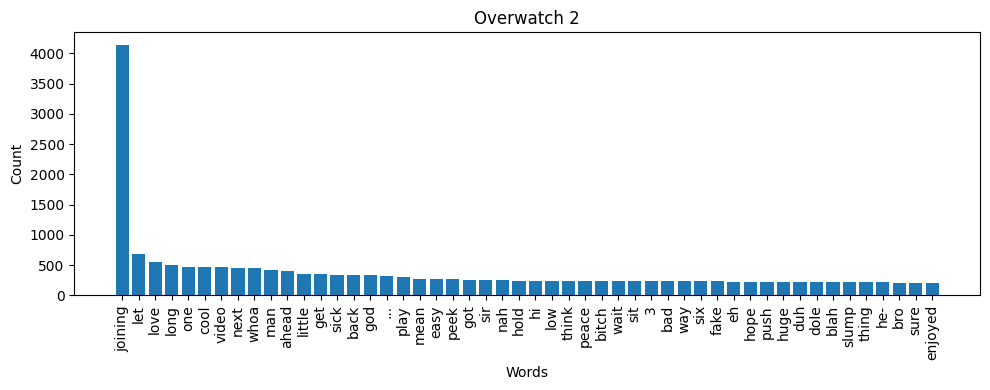

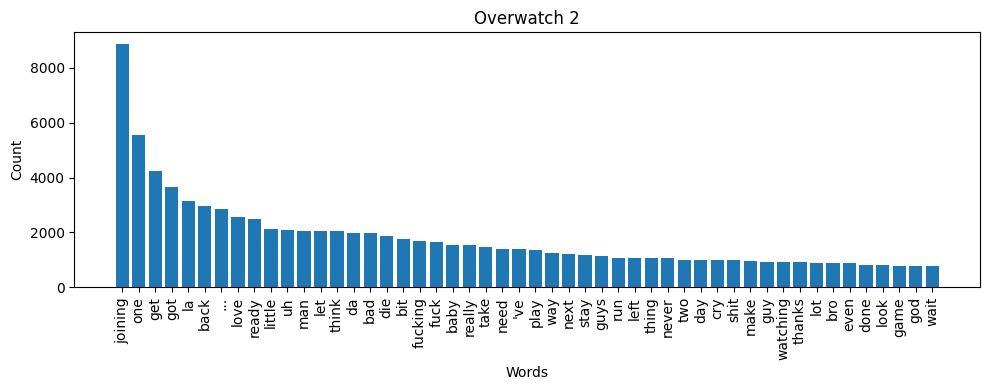

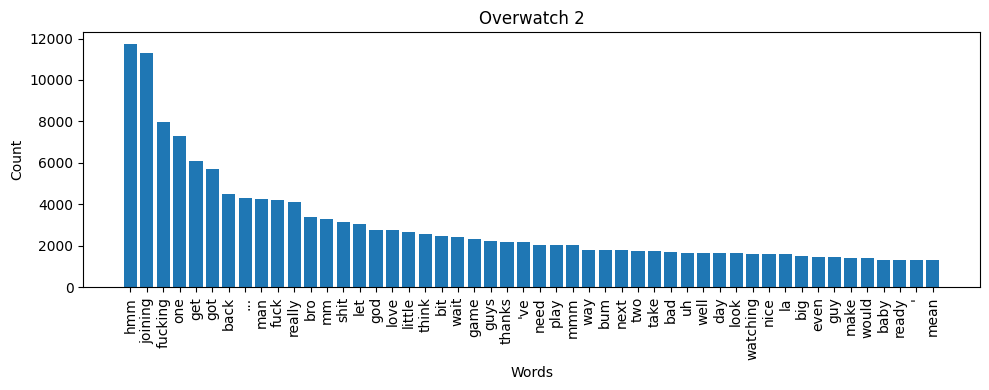

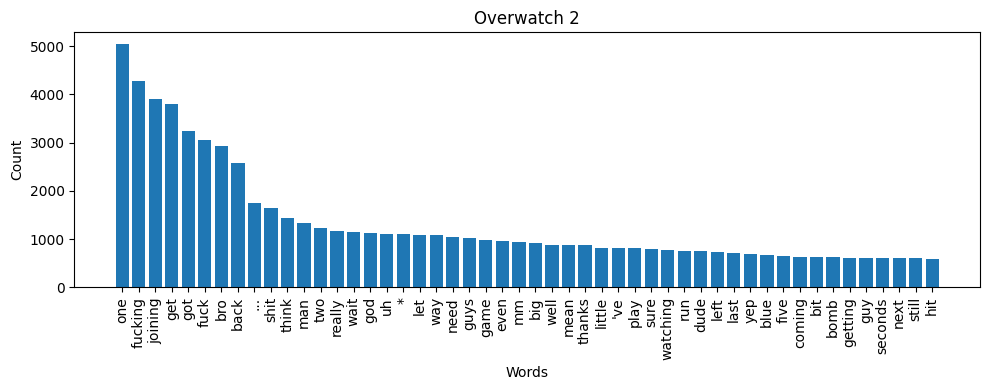

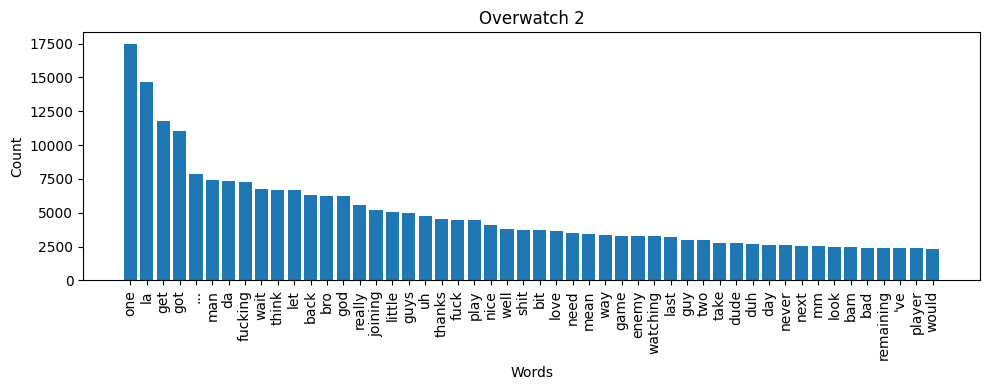

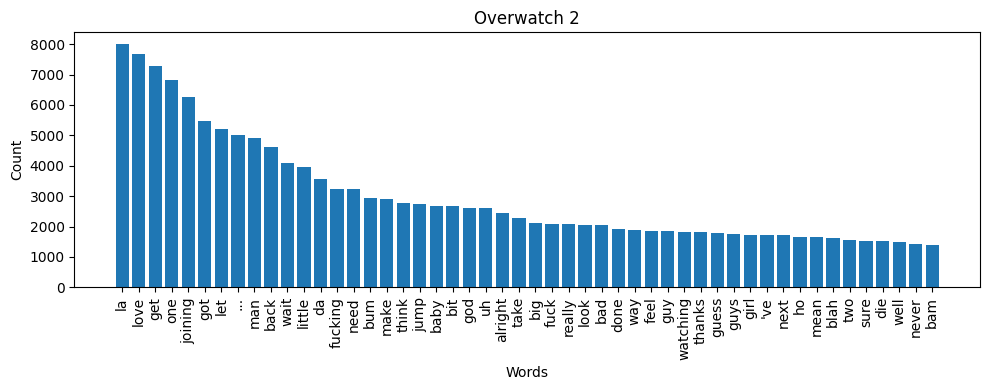

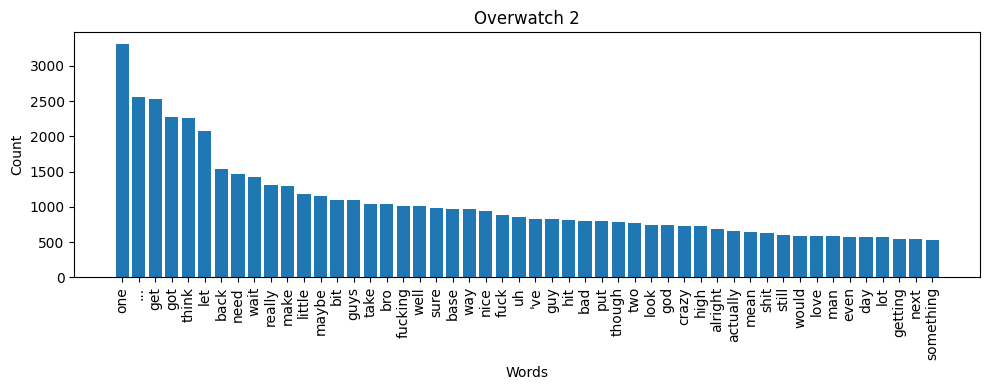

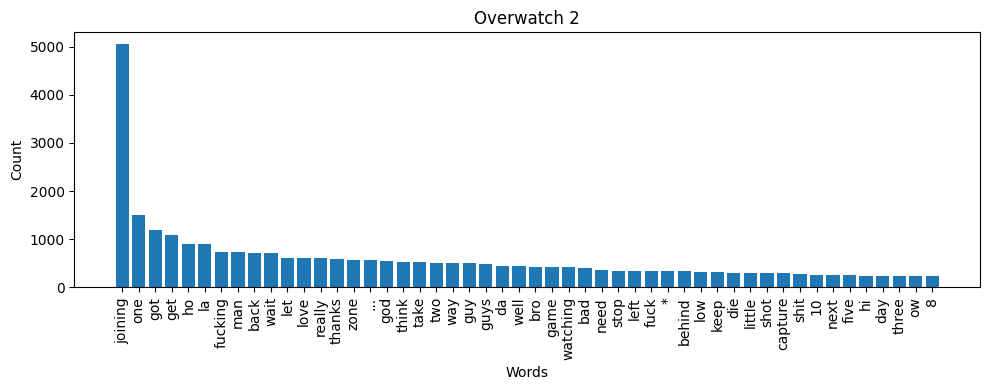

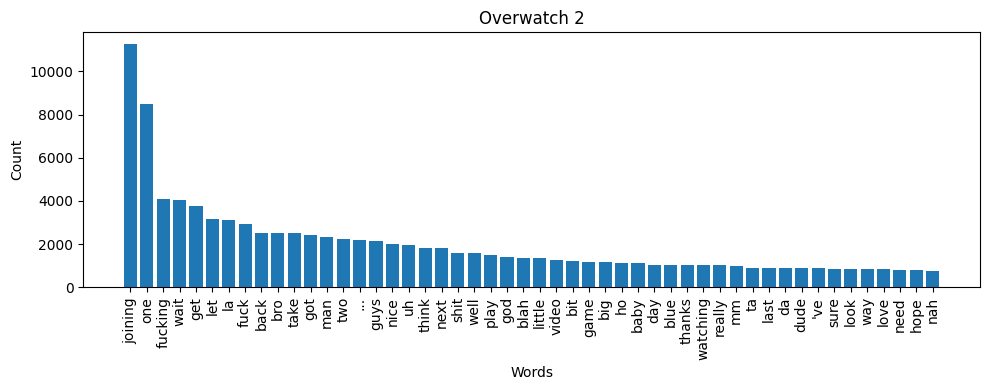

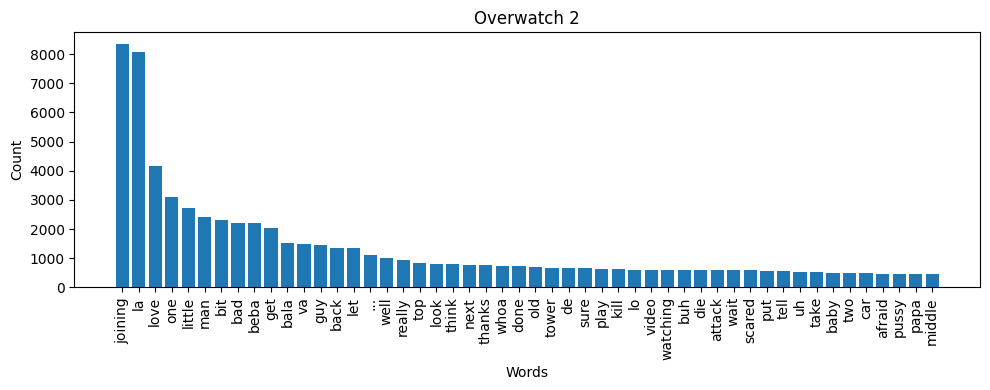

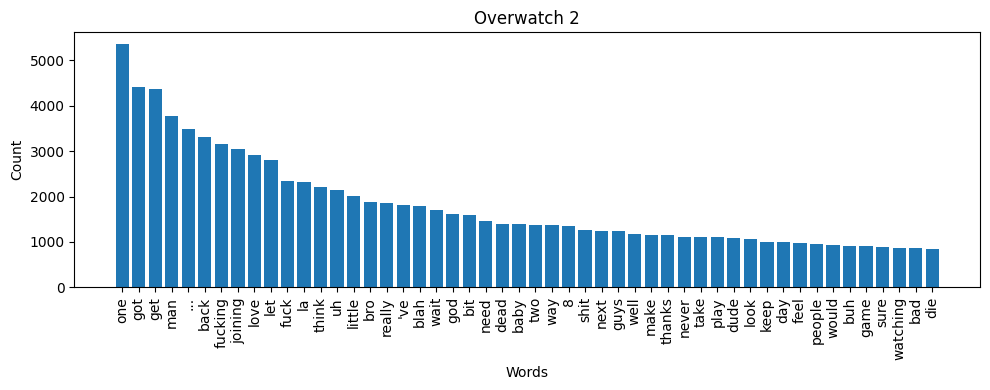

In [252]:
for game, tokens in filtered_text.items():
    data = nltk.FreqDist(tokens).most_common(n=50)
    words, counts = zip(*data)
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(words, counts)
    plt.title(c)
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()